**Importeren van benodigde libraries & het imporeren van de eerste dataset**

In [131]:
import pandas as pd
import numpy as np
import seaborn as sn

dataframeGB = pd.read_csv("../initialdata/GBvideos.csv")

In [114]:
dataframeGB

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


<br><br>
**Tags in de beschrijving**<br><br>
YouTube maakt gebruik van tags. Volgens Google help, gemaakt door hetzelfde moederbedrijf als YouTube, hebben tags de volgende functie:

_"Tags are descriptive keywords you can add to your video to help people find your content."_
<br><br>
Een tag zorgt er dus voor dat een video makkelijker te vinden is. 
<br>
Hierdoor kan de hypothese worden gesteld dat er een verband is tussen het vinden van een video (het aantal views) en de tags in de beschrijving.<br> Deze hypothese zal in dit onderdeel worden onderzocht.<br><br>
Het onderzoeken van de tags zal gebeuren aan de hand van deelvragen:
* Hoeveel tags worden er gebruikt per video?
* Welke tags worden het meest gebruikt voor trending videos?
* is er een verband tussen het aantal tags per video en het aantal views van deze video?



Om te beginnen is er wat data preparation nodig. Het is namelijk zo dat de tags in de dataset allemaal achter elkaar staan, en opgeslagen zijn als object, en dit object eruit ziet als een hele lange lijst met tekst gescheiden door het "**|**" teken. Dit is hieronder te zien.

In [3]:
print("Het datatype van tags is: {0}. \nEen {0} in dit dataframe ziet er als volgt uit:\n\n{1}".format(dataframeGB.tags.dtype, dataframeGB["tags"][0]))

Het datatype van tags is: object. 
Een object in dit dataframe ziet er als volgt uit:

christmas|"john lewis christmas"|"john lewis"|"christmas ad"|"mozthemonster"|"christmas 2017"|"christmas ad 2017"|"john lewis christmas advert"|"moz"


Het werken met deze data is lastig, om deze reden zal er wat data preparatie moeten worden gedaan. Deze preparatie wordt uitgevoerd met de volgende stappen:
- De tags datatypes omzetten van objecten naar string
- De string tags scheiden op basis van het "**|**" teken
- Het verwijderen van de aanhalingstekens die sommige tags bevatten
- Het zetten van [None] tags naar lege cellen zodat ze tellen als 0
- Het verwijderen van videos die al in trending zijn geweest

_Het is belangrijk om te bedenken dat sommige videos meerdere keren kunnen voorkomen in dit dataframe. Dit gebeurt wanneer een video meerdere keren in trending is gekomen. Er is bij het analyseren van de tags gekozen om deze dubbele resultaten uit de dataframe te verwijderen, aangezien de tags bij deze videos hetzelfde blijven, en er is gekozen om deze dataset vanuit het oogpunt van iemand die in trending wil komen is bekeken, en hierbij niet de pre willen meenemen dat deze persoon al eerder dezelfde video in trending heeft gehad._<br><br>

Hieronder wordt er een nieuw dataframe gemaakt met title en tags. De videos die al in de dataset staan worden worden verwijdrd, zodat een video maar een keer voorkomt.

In [126]:
dataframeGB = dataframeGB.drop_duplicates(subset = 'video_id', keep= 'first') #drops records with duplicates in the video_id column
dataframeGB["tags"] = dataframeGB["tags"].replace("[none]", "")
df = pd.DataFrame({"title" : dataframeGB["title"], "tags" : dataframeGB["tags"].str.split("|")}) 
df

,title,tags
0,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi..."
1,Taylor Swift: …Ready for It? (Live) - SNL,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ..."
2,Eminem - Walk On Water (Audio) ft. Beyoncé,"[Eminem, ""Walk"", ""On"", ""Water"", ""Aftermath/Sha..."
3,Goals from Salford City vs Class of 92 and Fri...,"[Salford City FC, ""Salford City"", ""Salford"", ""..."
4,Dashcam captures truck's near miss with child ...,[]
...,...,...
38763,Conway: People are bending to the will of Pres...,"[Fox News Channel, ""FNC"", ""Fox News"", ""News"", ..."
38767,Семён Слепаков: Олé-Олé-Олé!,"[Семен Слепаков, ""гитара"", ""бард-десятник"", ""C..."
38782,Live It Up (Official Video) - Nicky Jam feat. ...,"[Nicky Jam, ""NickyJamPR"", ""latin"", ""will smith..."
38793,The Chainsmokers - Somebody ft. Drew Love (Ror...,"[The Chainsmokers Somebody, ""Chainsmokers Some..."


<br>**Hoeveelheid tags**<br><br>In dit onderdeel gaat er worden uitgezocht hoeveel tags er worden gebruikt voor trending videos. Dit gaat gebeuren door te kijken naar:
* Het gemiddelde aantal tags per video
* De maximum hoeveelheid tags per video
* De normaalverdeling van de hoeveelheid tags per video<br><br>
Hieronder is het gemiddeld aantal tags per video te zien en de maximale hoeveelheid tags.

In [127]:
tagCount = [len(x) for x in df.tags] #list comprehension to create a list with tags per video
dataFrameTagCount = pd.DataFrame({"title" : dataframeGB["title"],"views" : dataframeGB["views"] ,"tags" : dataframeGB["tags"].str.split("|"), "tagCount" : tagCount})

mostTags = dataFrameTagCount.sort_values(by=["tagCount", "title"], ascending = False) #video with most tags
print("Uit de onderstaande dataframe is te halen dat een video in trending gemiddeld afgerond {0} tags heeft.\n De video {1} heeft de meeste tags, namelijk {2}".format(round(dataFrameTagCount.tagCount.mean()), mostTags.title.head(1).to_string(index = False), mostTags.tagCount.head(1).to_string(index=False)))
dataFrameTagCount

Uit de onderstaande dataframe is te halen dat een video in trending gemiddeld afgerond 19 tags heeft.
 De video  부부싸움중인 강아지들 (사람이랑 완전 똑같음ㅋㅋㅋ) heeft de meeste tags, namelijk  78


,title,views,tags,tagCount
0,John Lewis Christmas Ad 2017 - #MozTheMonster,7224515,"[christmas, ""john lewis christmas"", ""john lewi...",9
1,Taylor Swift: …Ready for It? (Live) - SNL,1053632,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",36
2,Eminem - Walk On Water (Audio) ft. Beyoncé,17158579,"[Eminem, ""Walk"", ""On"", ""Water"", ""Aftermath/Sha...",6
3,Goals from Salford City vs Class of 92 and Fri...,27833,"[Salford City FC, ""Salford City"", ""Salford"", ""...",9
4,Dashcam captures truck's near miss with child ...,9815,[],1
...,...,...,...,...
38763,Conway: People are bending to the will of Pres...,99048,"[Fox News Channel, ""FNC"", ""Fox News"", ""News"", ...",21
38767,Семён Слепаков: Олé-Олé-Олé!,6597033,"[Семен Слепаков, ""гитара"", ""бард-десятник"", ""C...",15
38782,Live It Up (Official Video) - Nicky Jam feat. ...,20409647,"[Nicky Jam, ""NickyJamPR"", ""latin"", ""will smith...",33
38793,The Chainsmokers - Somebody ft. Drew Love (Ror...,402345,"[The Chainsmokers Somebody, ""Chainsmokers Some...",17


# visualisatie


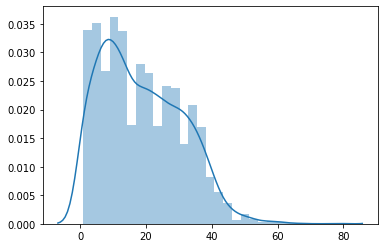

In [136]:
sn.distplot(tagCount)


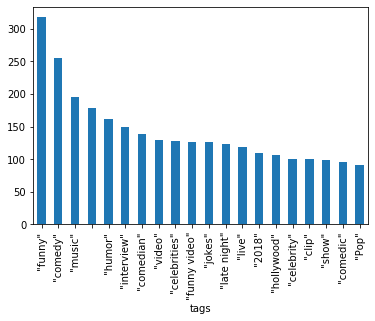

In [138]:
tagsDataframe = df.explode("tags") #per tag wordt er een nieuwe record aangemaakt met de video ID erbij 
tagsDataframe

f = tagsDataframe.groupby("tags").size().sort_values(ascending = False).head(20) #Top 20 most used tags
f.plot.bar()

grey
unknown
